In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
df = pd.read_csv(r'../PQS/benchmarks.csv')
speed_df = pd.read_json(r'../PQS/speed_kem.json')
print(df.head(5))

                   KEM_name  public_key  secret_key  ciphertext  NIST_level  \
0  Classic-McEliece-8192128         240       14080         240           5   
1                 Kyber1024        1568        3168        1568           5   
2            NTRU-HRSS-1373        2401        2983        2401           5   
3             FireSaber-KEM        1472        3040        1472           5   

   keygen/s  encaps/s  decaps/s  
0         0         0         0  
1         1         2         0  
2         5         0         0  
3         0         0         0  


In [143]:
# Execution speed 
def extractValues(df,kem_name):
    return df[kem_name]['x86_64']['']

keygen = []
encaps = []
decaps = []

for i in df['KEM_name']:
    kem_df = extractValues(speed_df,i) 
    keygen.append( kem_df['keygen']  )
    encaps.append( kem_df['encaps']  )
    decaps.append( kem_df['decaps']  )

df["keygen/s"] = keygen
df["encaps/s"] = encaps
df["decaps/s"] = decaps


print(df.head(5))


                   KEM_name  public_key  secret_key  ciphertext  NIST_level  \
0  Classic-McEliece-8192128         240       14080         240           5   
1                 Kyber1024        1568        3168        1568           5   
2            NTRU-HRSS-1373        2401        2983        2401           5   
3             FireSaber-KEM        1472        3040        1472           5   

   keygen/s  encaps/s  decaps/s  
0      1.23  14334.33   6345.33  
1  37414.33  32617.00  42218.67  
2    155.23  10388.00   3638.67  
3  22584.67  21117.33  21937.33  


<BarContainer object of 4 artists>

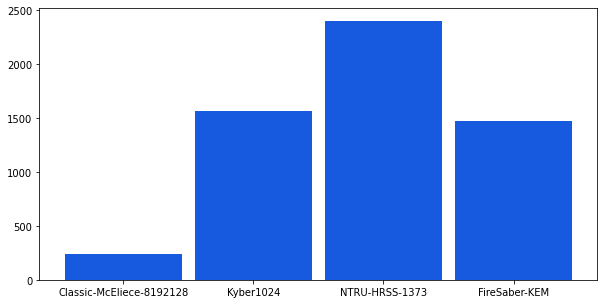

In [144]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df["KEM_name"], df["public_key"], color ='#185ADF',
        width = 0.9)

<BarContainer object of 4 artists>

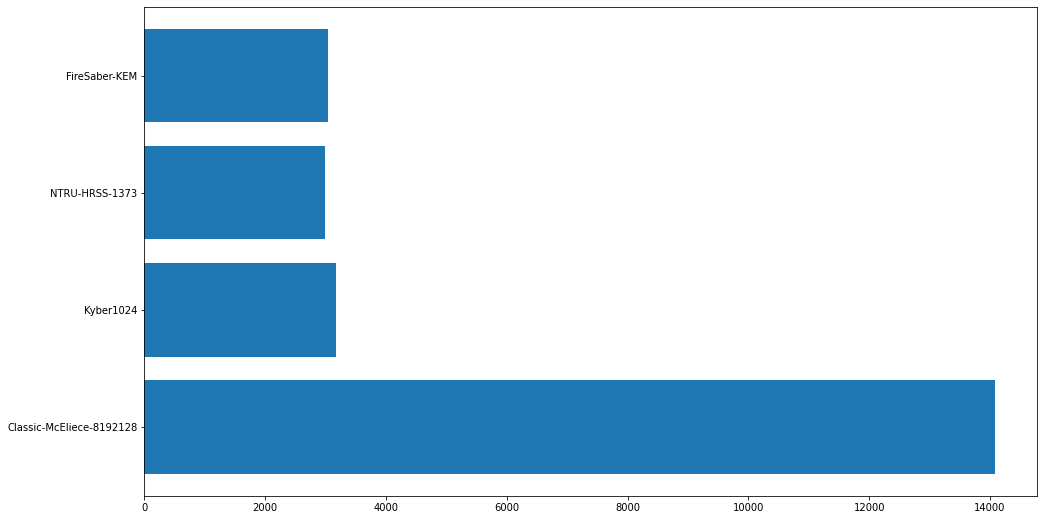

In [145]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(df["KEM_name"], df["secret_key"])

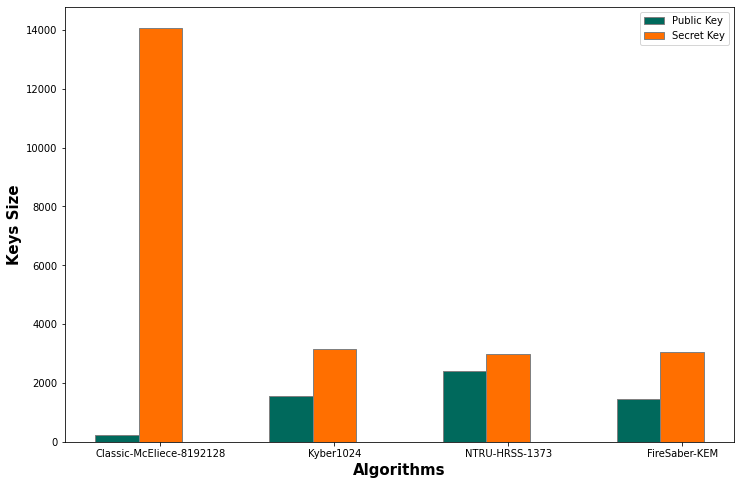

In [146]:
#Graph private and public key

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
#     ciphertext

# set height of bar
public_key =   df["public_key"]  #[12, 30, 1, 8, 22]
secret_key =  df["secret_key"]  #   [28, 6, 16, 5, 10]
# CSE =  df["ciphertext"] # [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(public_key))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, public_key, color ='#00695C', width = barWidth,
        edgecolor ='grey', label ='Public Key')
plt.bar(br2, secret_key, color ='#FF6F00', width = barWidth,
        edgecolor ='grey', label ='Secret Key')
# plt.bar(br3, CSE, color ='b', width = barWidth,
#         edgecolor ='grey', label ='ciphertext')
 
# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 15)
plt.ylabel('Keys Size', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(public_key))],
        df["KEM_name"])
 
plt.legend()
plt.show()

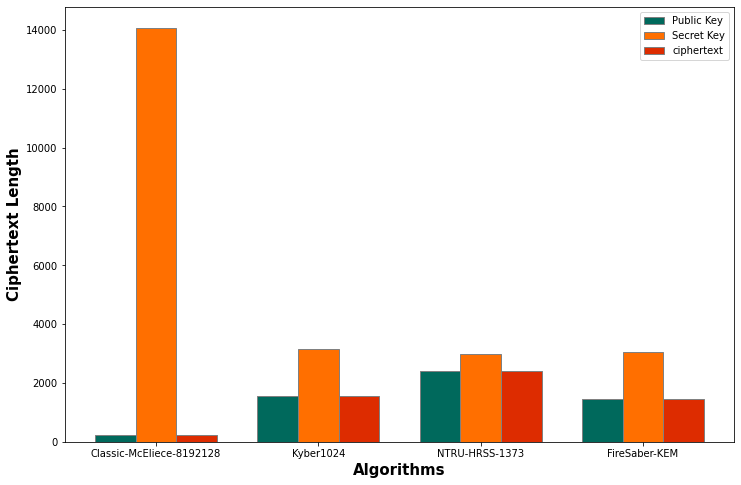

In [147]:
#Graph private and public key

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
#     ciphertext

# set height of bar
public_key =   df["public_key"]  
secret_key =  df["secret_key"]  
ciphertext =  df["ciphertext"] 
 
# Set position of bar on X axis
br1 = np.arange(len(public_key))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, public_key, color ='#00695C', width = barWidth,
        edgecolor ='grey', label ='Public Key')
plt.bar(br2, secret_key, color ='#FF6F00', width = barWidth,
        edgecolor ='grey', label ='Secret Key')
plt.bar(br3, ciphertext, color ='#DD2C00', width = barWidth,
        edgecolor ='grey', label ='ciphertext')
 
# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 15)
plt.ylabel('Ciphertext Length', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(public_key))],
        df["KEM_name"])
 
plt.legend()
plt.show()

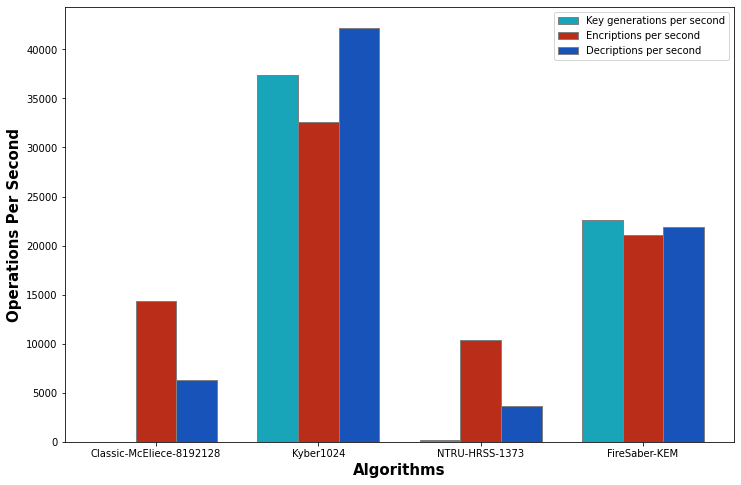

In [152]:
#Graph private and public key

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
#     ciphertext keygen/s  encaps/s  decaps/s  

# set height of bar
public_key =   df["keygen/s"]  
secret_key =  df["encaps/s"]  
ciphertext =  df["decaps/s"] 
 
# Set position of bar on X axis
br1 = np.arange(len(public_key))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, public_key, color ='#18A5BA', width = barWidth,
        edgecolor ='grey', label ='Key generations per second')
plt.bar(br2, secret_key, color ='#BA2D18', width = barWidth,
        edgecolor ='grey', label ='Encriptions per second')
plt.bar(br3, ciphertext, color ='#1853BA', width = barWidth,
        edgecolor ='grey', label ='Decriptions per second')
 
# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 15)
plt.ylabel('Operations Per Second', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(public_key))],
        df["KEM_name"])
 
plt.legend()
plt.show()